In [1]:
import torch
import time
import matplotlib.pyplot as plt

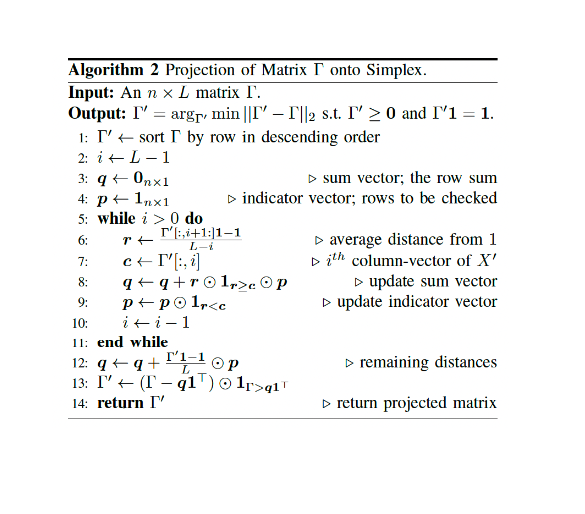

In [2]:
def projsplx(n = 4096, l = 2):
        X  = torch.rand((n,l))
        X2 = torch.sort(X, 1)[0]
        _n = X2.shape[0]
        _l = X2.shape[1]

        i = _l-2
        current_mult = torch.ones((_n, 1))
        t_pred = torch.zeros((_n, 1))

        while i>=0:
            y_i = X2[:,i].reshape(-1,1)
            t_i = ((torch.sum(X2[:,i+1:], axis = 1)-1)/(_l - (i+1))).reshape(-1,1)
            t_pred += t_i*(t_i>=y_i)*current_mult
            current_mult = current_mult*(t_i<y_i)
            i -= 1

        t_i = ((torch.sum(X, axis = 1)-1)/_l).reshape(-1,1)
        t_pred += t_i*current_mult
        return (X - t_pred)*(X>t_pred)

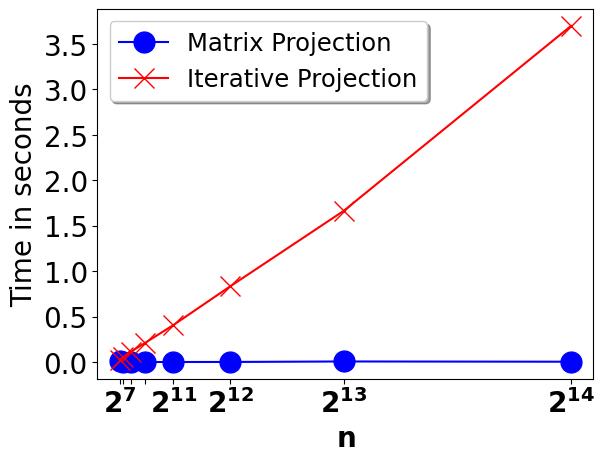

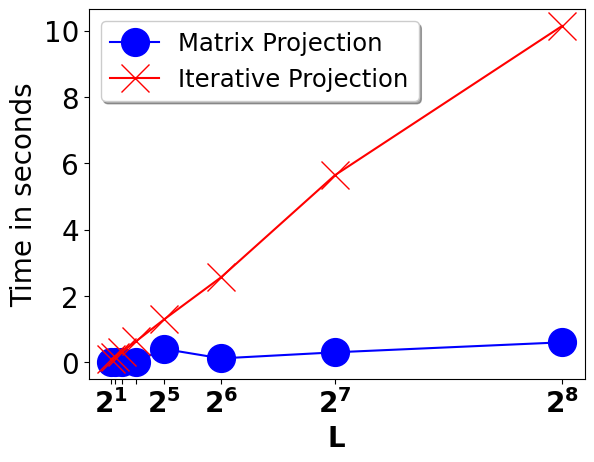

In [3]:
alltime_1 = []
alltime_2 = []
for n in [128, 256, 512, 1024, 2048, 4096, 8192, 16384]:
    start_time = time.time()
    projsplx(n=n, l=4)
    elapsed_time = time.time() - start_time
    #print(elapsed_time)
    alltime_1.append(elapsed_time)
    
    start_time = time.time()
    for _ in range(n):
        r = projsplx(n=1, l=4)
    elapsed_time = time.time() - start_time
    #print(elapsed_time)
    #print()
    alltime_2.append(elapsed_time)
    
plt.plot([128, 256, 512, 1024, 2048, 4096, 8192, 16384], alltime_1, color = 'blue', marker = 'o',markersize=15, label = 'Matrix Projection')
plt.plot([128, 256, 512, 1024, 2048, 4096, 8192, 16384], alltime_2, color = 'red', marker = 'x',markersize=15, label = 'Iterative Projection')
plt.xlabel(r'$\mathbf{n}$', fontsize=20)
plt.ylabel('Time in seconds', fontsize=20)
plt.xticks([128, 256, 512, 1024, 2048, 4096, 8192, 16384], 
           [r'$\mathbf{2^{7}}$', r'', r'', r'', r'$\mathbf{2^{11}}$', r'$\mathbf{2^{12}}$', r'$\mathbf{2^{13}}$', 
            r'$\mathbf{2^{14}}$'],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=17.5, loc='upper left', fancybox=True, shadow=True, columnspacing=0.47)
plt.savefig(f'./Figures/scalability_vs_n.pdf', 
                format = 'pdf', bbox_inches='tight', dpi=1200)
plt.show()


alltime_11 = []
alltime_22 = []
for l in [16, 32, 64, 128, 256, 512, 1024, 2048]:
    start_time = time.time()
    projsplx(n=1000, l=l)
    elapsed_time = time.time() - start_time
    #print(elapsed_time)
    alltime_11.append(elapsed_time)
    
    start_time = time.time()
    for _ in range(100):
        r = projsplx(n=1, l=l)
    elapsed_time = time.time() - start_time
    #print(elapsed_time)
    #print()
    alltime_22.append(elapsed_time)
    
plt.plot([2, 4, 8, 16, 32, 64, 128, 256], alltime_11, color = 'blue', marker = 'o',markersize=20, label = 'Matrix Projection')
plt.plot([2, 4, 8, 16, 32, 64, 128, 256], alltime_22, color = 'red', marker = 'x',markersize=20, label = 'Iterative Projection')
plt.xticks([2, 4, 8, 16, 32, 64, 128, 256], 
           [r'$\mathbf{2^{1}}$', r'', r'', r'', r'$\mathbf{2^{5}}$', r'$\mathbf{2^{6}}$', 
            r'$\mathbf{2^{7}}$', r'$\mathbf{2^{8}}$'],fontsize=20)
plt.xlabel(r'$\mathbf{L}$', fontsize=20)
plt.ylabel('Time in seconds', fontsize=20)
plt.legend(fontsize=17.5, loc='upper left', fancybox=True, shadow=True, columnspacing=0.47)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig(f'./Figures/scalability_vs_L.pdf', 
                format = 'pdf', bbox_inches='tight', dpi=1200)
plt.show()
